# Pareto Distribution

The **Pareto distribution**, named after the Italian economist Vilfredo Pareto, is a power law probability distribution useful in many real world problems [1]. Pareto developed the distribution to describe the distribution of wealth in an economy. It is one of the so-called “fat-tailed” distributions [1].  

The Pareto distribution must be greater than zero, and is unbounded above [1]. It is also known as the “80-20 rule”. In this distribution, 80 percent of the weights are in the lowest 20 percent of the range, while the other 20 percent fill the remaining 80 percent of the range [1].    

The **probability density** for the Pareto distribution is  

$p(x) = \frac{am^a}{x^{a+1}}$

where $a$ is the shape and $m$ is the scale [1].  

In [1]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

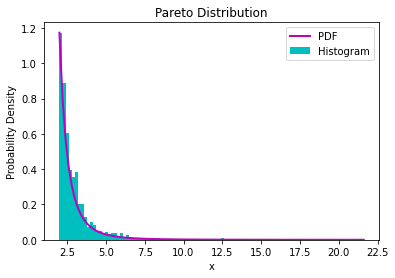

In [2]:
# numpy example [1]
# draw samples from the pareto distribution
a, m = 3., 2.  # shape and mode
s = (np.random.default_rng().pareto(a, 1000) + 1) * m

# display histogram of the samples, along with probability density function
count, bins, _ = plt.hist(s, 100, density=True, color='c', label='Histogram')
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='m', label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Pareto Distribution')
plt.legend()
plt.show()

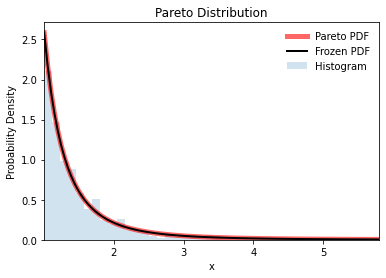

In [3]:
# scipy example [2]
fig, ax = plt.subplots(1, 1)

# calculate the first four moments
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')

# display the probability density function
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b), 'r-', lw=5, alpha=0.6, label='Pareto PDF')

# alternatively, the distribution object can be called (as a function) to fix the shape, 
# location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.
# freeze the distribution and display the frozen pdf
rv = pareto(b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Frozen PDF')

# check accuracy of cdf and ppf
vals = pareto.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))

# generate random numbers
r = pareto.rvs(b, size=1000)

# compare the histogram
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='Histogram')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Pareto Distribution')
plt.show()

# References

[1] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html    
[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html   